# Final Project Submission

# Project Overview

This project uses exploratory data analysis to generate insights for a business stakeholder.

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.






# Objectives

1. Studio and Best-Selling Movies:

    Identify the film studio(s) responsible for producing the best-selling movies.
   
   


2. Language and Movie Ratings:

    Investigate the languages in which highly-rated movies are predominantly produced.
   
   


3. Movie Genres and Ratings:

    Identify the top-rated movie genres based on user ratings.

# The Data

Box Office Mojo

IMDB

Rotten Tomatoes

TheMovieDB

The Numbers

In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import csv  # Handle CSV file operations
import pandas as pd  # Data manipulation with pandas
import numpy as np  # Numerical operations with NumPy
import matplotlib.pyplot as plt  # Plotting with Matplotlib
import sqlite3  # SQLite database operations
import zipfile
import os

# BOX OFFICE MOJO ANALYSIS

In [2]:
# Reading the bom.movie_gross.csv CSV file into a pandas DataFrame and displaying the first few rows of the data
dfbox = pd.read_csv('bom.movie_gross.csv')
dfbox.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#checking the data types
dfbox.columns
dfbox.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

# Data Cleaning

In [4]:
#changing the values of the foreign_gross column from object to numerical
dfbox['foreign_gross'] = pd.to_numeric(dfbox['foreign_gross'], errors='coerce')

dfbox.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [5]:
#checking if there are any duplicated rows in the data.
dfbox.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [6]:
#checking for null values in the data.
dfbox.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [7]:
#replacing the null values in the foreign_gross column with median values.
dfbox['foreign_gross'].median()
dfbox['foreign_gross'] = dfbox['foreign_gross'].fillna(dfbox['foreign_gross'].median())
dfbox

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


In [8]:
#replacing the null values of the domestic_gross column with median values of the same column.
dfbox['domestic_gross'].median()
dfbox['domestic_gross'] = dfbox['domestic_gross'].fillna(dfbox['domestic_gross'].median())
dfbox

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


In [9]:
#creating a new column called worldwide_gross which is the sum of the values of the foreign_gross column and the domestic_gross column.
dfbox['worldwide_gross'] = dfbox['foreign_gross'] + dfbox['domestic_gross'] 
dfbox

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018,1.890620e+07
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018,1.890480e+07
3384,El Pacto,Sony,2500.0,18900000.0,2018,1.890250e+07
3385,The Swan,Synergetic,2400.0,18900000.0,2018,1.890240e+07


In [10]:
# Checking for missing values in the DataFrame
dfbox.isna().sum()

title              0
studio             5
domestic_gross     0
foreign_gross      0
year               0
worldwide_gross    0
dtype: int64

In [11]:
# Handling missing values in the studio column and rechecking for missing values
dfbox['studio'].fillna('Unknown', inplace=True)
dfbox.isna().sum()

title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
worldwide_gross    0
dtype: int64

In [12]:
# This code provides a quick summary of the missing values in the 'foreign_gross' column.
# It shows the count of missing values and non-missing values.
dfbox['foreign_gross'].isna().value_counts()

foreign_gross
False    3387
Name: count, dtype: int64

In [13]:
# checking the 'domestic_gross' column for missing values.
# the code shows the count of missing values and non-missing values.
dfbox['domestic_gross'].isna().value_counts()

domestic_gross
False    3387
Name: count, dtype: int64

In [14]:
 # Counting the occurrences of each unique value in the 'studio' column.
# This code provides a quick summary of how many times each studio appears in the dataset.
dfbox['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 258, dtype: int64

In [15]:
# Filtering the DataFrame so that the resulting DataFrame will only contain rows where either 'foreign_gross' or 'domestic_gross' exceeds 200,000,000.

dfbox = dfbox[(dfbox['foreign_gross'] > 200000000) | (dfbox['domestic_gross'] > 200000000)]
dfbox

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3109,Green Book,Uni.,85100000.0,234700000.0,2018,3.198000e+08
3110,Skyscraper,Uni.,68400000.0,236400000.0,2018,3.048000e+08
3112,Pacific Rim Uprising,Uni.,59900000.0,231100000.0,2018,2.910000e+08
3113,Maze Runner: The Death Cure,Fox,58000000.0,230200000.0,2018,2.882000e+08


# Data Visualization

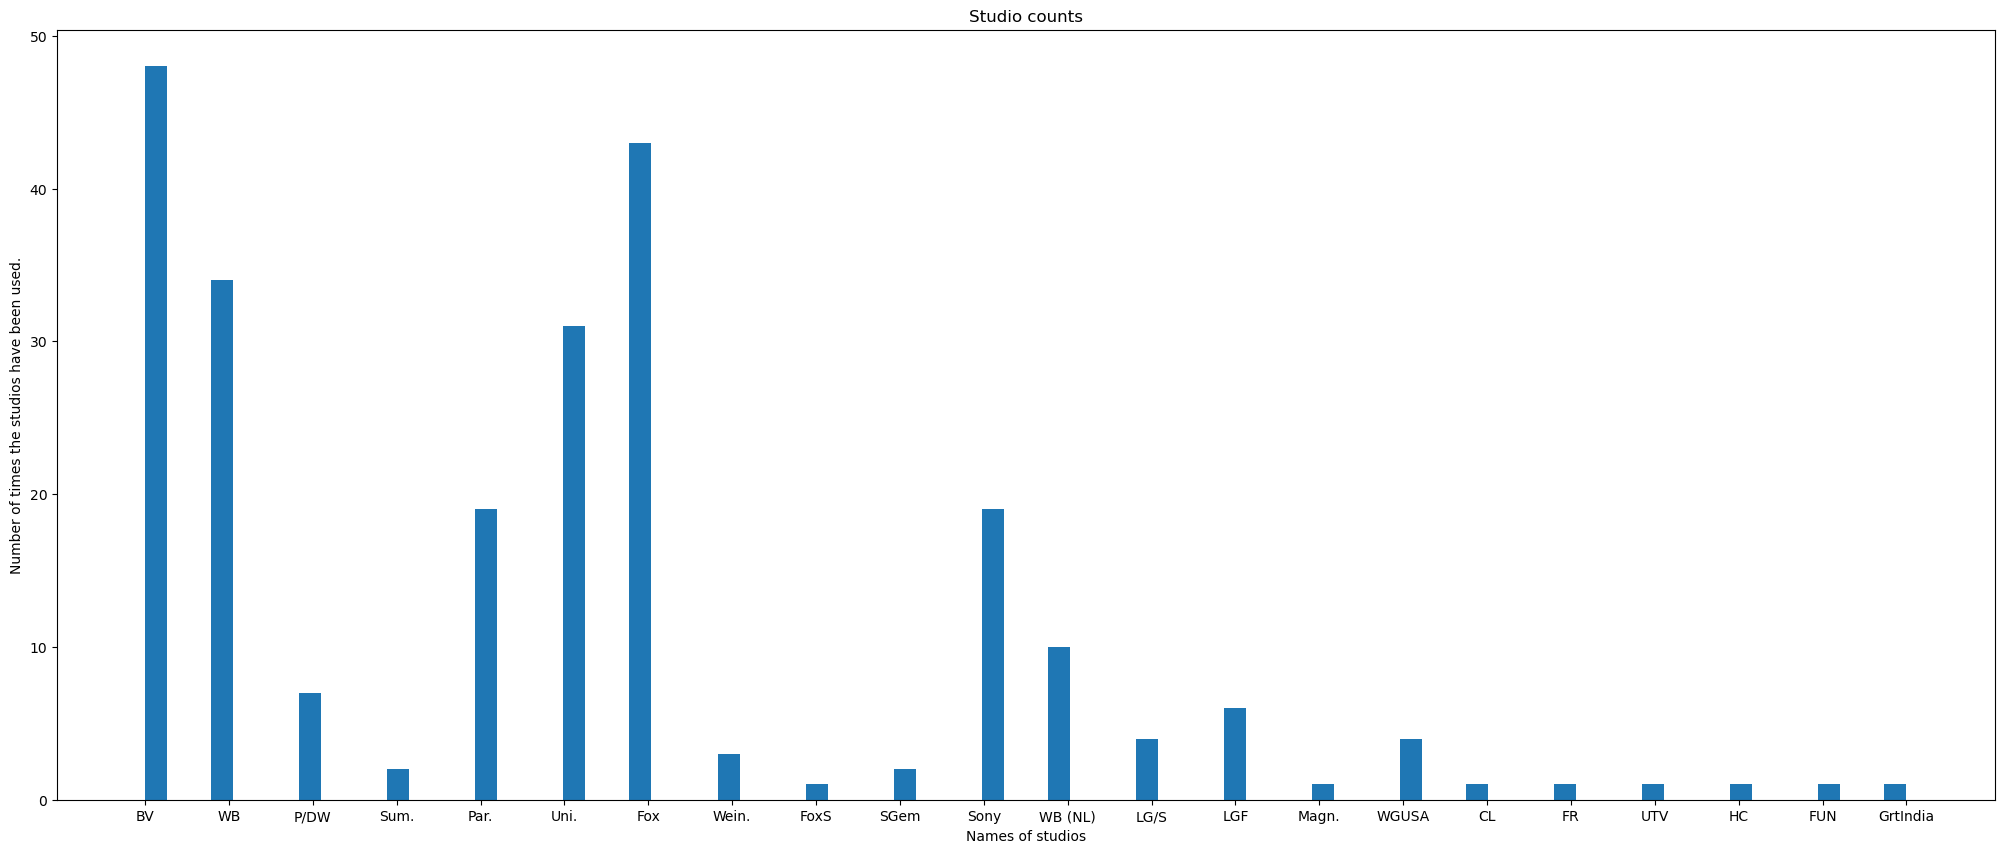

In [16]:
# Creating a histogram to visualize the distribution of studio counts


fig, ax = plt.subplots(figsize=(25, 10))

plt.hist(dfbox['studio'], bins=80) 

ax.set_xlabel('Names of studios')
ax.set_ylabel('Number of times the studios have been used.')
ax.set_title('Studio counts')


plt.show()

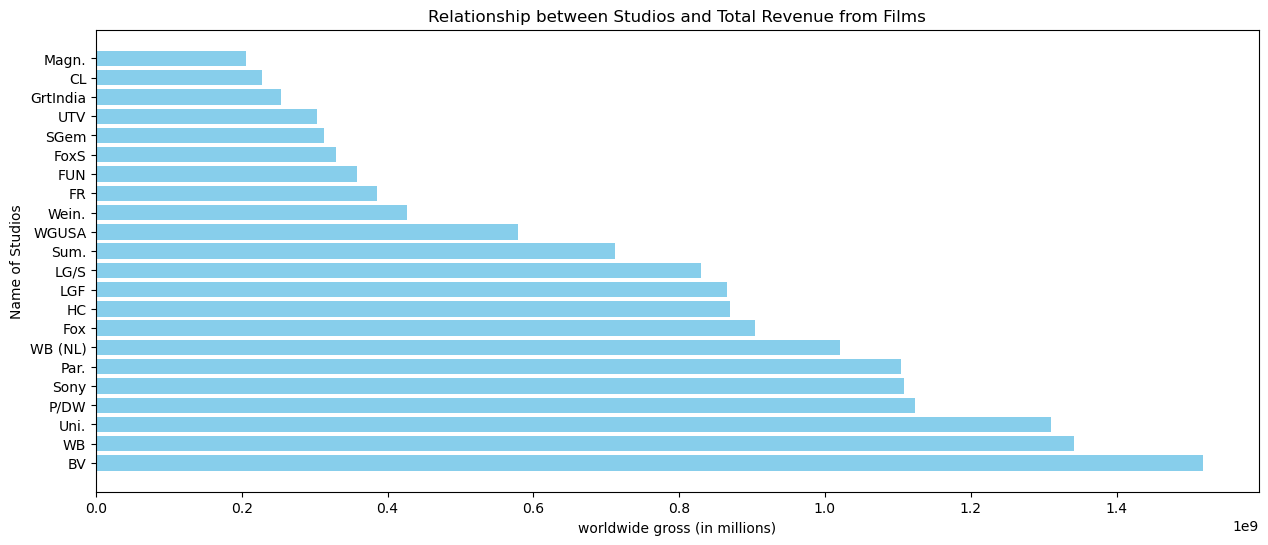

In [17]:
# Creating a horizontal bar chart to visualize the relationship between studios and worldwide gross revenue

fig, ax = plt.subplots(figsize=(15, 6))

# Sort the DataFrame by worldwide_gross for better visualization
dfbox_sorted = dfbox.sort_values(by='worldwide_gross', ascending=False)
# Use horizontal bar chart for better readability
plt.barh(y=dfbox_sorted['studio'], width=dfbox_sorted['worldwide_gross'], color='skyblue')

ax.set_xlabel('worldwide gross (in millions)')
ax.set_ylabel('Name of Studios')
ax.set_title('Relationship between Studios and Total Revenue from Films')

plt.show()

# THE MOVIEDB DATA ANALYSIS

In [18]:
# Reading the tmdb.movies.csv CSV file into a pandas DataFrame
dfthemovie = pd.read_csv('tmdb.movies.csv')
dfthemovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [19]:
# Checking the columns and data types in the DataFrame
dfthemovie.columns
dfthemovie.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

# Data Cleaning

In [20]:
# Counting the occurrences of duplicated rows in the DataFrame
dfthemovie.duplicated().value_counts()

False    26517
Name: count, dtype: int64

In [21]:
# Checking for missing values in the DataFrame
dfthemovie.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
# filtering the dataframe so that 'dfthemovie' will be updated to include only the rows where the 'vote_average' is greater than 7.5.
dfthemovie = dfthemovie[dfthemovie['vote_average'] > 7.5]
dfthemovie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
...,...,...,...,...,...,...,...,...,...,...
26327,26327,[18],502710,en,His Favorite Person,0.600,2018-03-04,His Favorite Person,8.0,1
26328,26328,[18],492902,en,Wren Boys,0.600,2018-01-19,Wren Boys,8.0,2
26329,26329,[99],474062,en,The End of Meat,0.600,2018-09-04,The End of Meat,8.0,3
26330,26330,[99],491080,pl,Over the Limit,0.600,2018-10-05,Over the Limit,7.8,5


# Data Visualization

In [23]:
# Grouping the DataFrame by 'original_language' and calculating the mean of 'popularity' for each group
grouped_data = dfthemovie.groupby('original_language')['popularity'].mean().reset_index()
grouped_data

,original_language,popularity
0,ab,0.600000
1,ar,3.199818
2,cn,6.294500
3,cs,0.788000
4,cy,0.600000
5,da,5.820500
6,de,2.754034
7,dz,0.600000
8,el,0.600000
9,en,1.882855


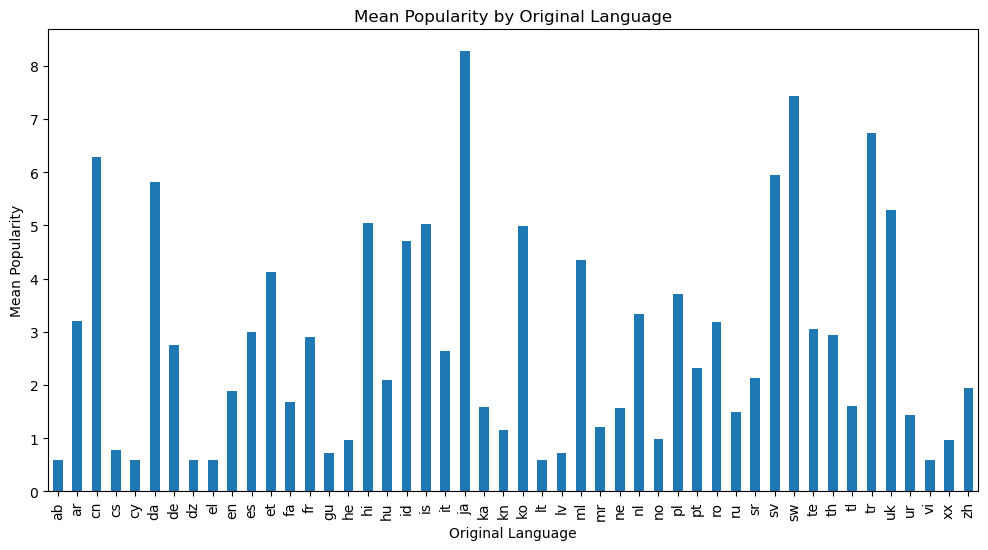

In [24]:
# Creating a bar chart to visualize the mean popularity of movies by original language
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.plot(kind='bar', x='original_language', y='popularity', ax=ax, legend=False)
ax.set_xlabel('Original Language')
ax.set_ylabel('Mean Popularity')
ax.set_title('Mean Popularity by Original Language')

plt.show()

In [25]:
# Grouping the DataFrame by 'original_language' and calculating the mean of 'vote_average' for each group
grouped_data2 = dfthemovie.groupby('original_language')['vote_average'].mean().reset_index()
grouped_data2

,original_language,vote_average
0,ab,9.000000
1,ar,8.036364
2,cn,8.350000
3,cs,8.850000
4,cy,8.000000
5,da,8.950000
6,de,8.620690
7,dz,10.000000
8,el,8.000000
9,en,8.757320


Text(0.5, 1.0, 'Mean Vote Average by Original Language')

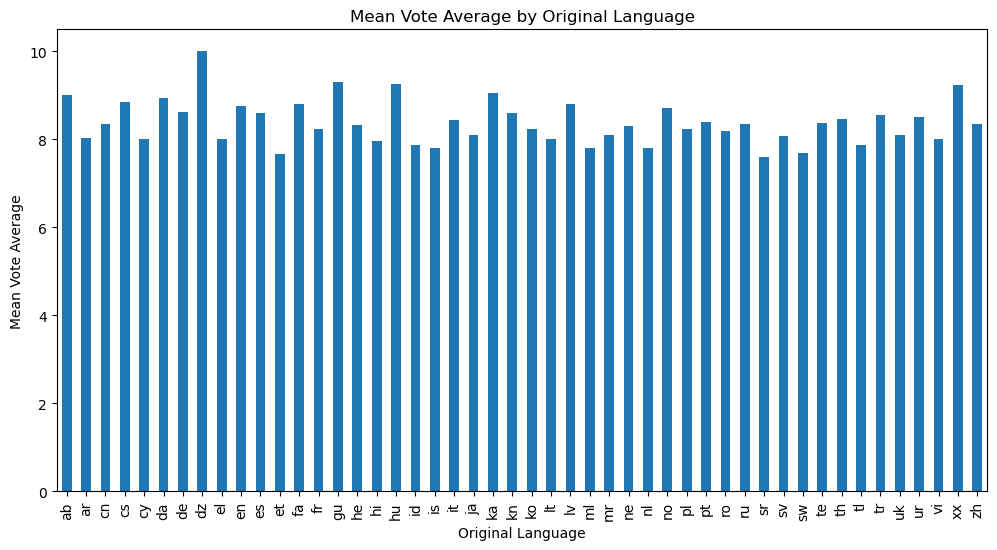

In [26]:
# Creating a bar chart to visualize the mean vote average of movies by original language
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data2.plot(kind='bar', x='original_language', y='vote_average', ax=ax, legend=False)
ax.set_xlabel('Original Language')
ax.set_ylabel('Mean Vote Average')
ax.set_title('Mean Vote Average by Original Language')

# THE NUMBERS DATA ANALYSIS

In [27]:
dfthenumbers = pd.read_csv('tn.movie_budgets.csv')
dfthenumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Data Cleaning

In [28]:
# Counting the occurrences of duplicated rows in the DataFrame
dfthenumbers.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [29]:
# Checking for missing values in the DataFrame
dfthenumbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [30]:
# Cleaning and converting the 'production_budget' column to float
dfthenumbers.loc[:, 'production_budget'] = dfthenumbers['production_budget'].replace('[\$,]', '', regex=True).astype(float)
dfthenumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,$0
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0


In [31]:
# Filtering the DataFrame so that 'dfthenumbers' will be updated to include only the rows where the 'production_budget' is greater than 200,000,000.

dfthenumbers = dfthenumbers[dfthenumbers['production_budget'] > 200000000 ]
dfthenumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,"$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,300000000.0,"$200,074,175","$879,620,923"


In [32]:
# Cleaning and converting the 'domestic_gross' column to float
dfthenumbers.loc[:, 'domestic_gross'] = dfthenumbers['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

dfthenumbers


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,"$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,"$963,420,425"
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,"$655,945,209"
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,"$879,620,923"


In [33]:
# Cleaning and converting the 'worldwide_gross' column to float
dfthenumbers.loc[:, 'worldwide_gross'] = dfthenumbers['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
dfthenumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747.0
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2053311220.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200.0
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,963420425.0
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,655945209.0
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,879620923.0


# Data Visualization

Text(0.5, 1.0, 'Relationship between Production Budget and Worldwide Gross')

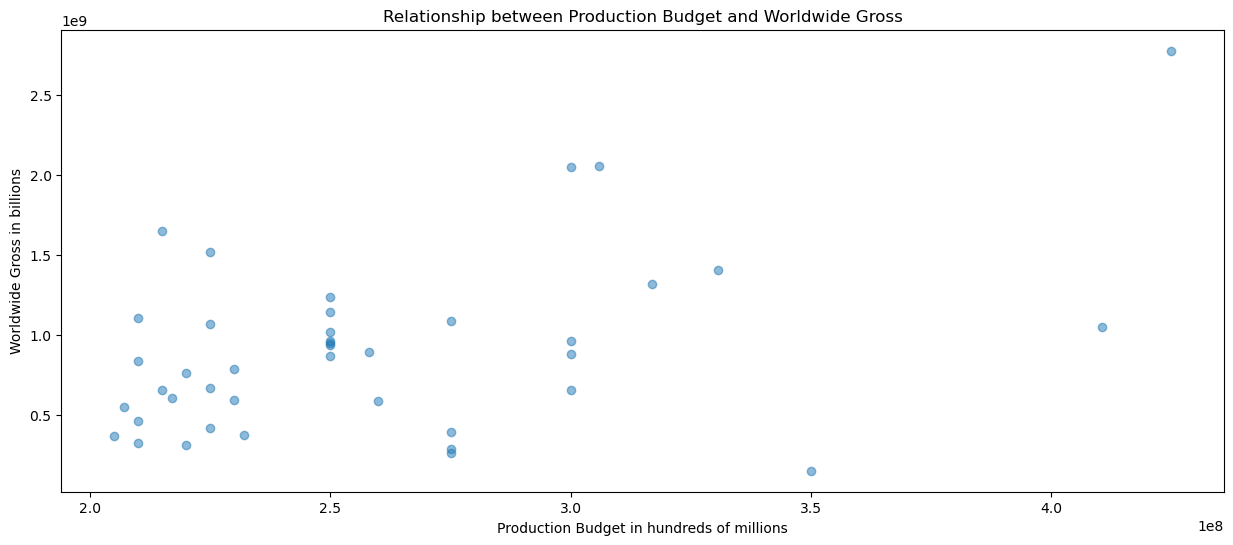

In [34]:
# Creating a scatter plot to visualize the relationship between production budget and worldwide gross
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(dfthenumbers['production_budget'], dfthenumbers['worldwide_gross'], alpha=0.5)
ax.set_xlabel('Production Budget in hundreds of millions')
ax.set_ylabel('Worldwide Gross in billions')
ax.set_title('Relationship between Production Budget and Worldwide Gross')

# IMDB DATA ANALYSIS

In [35]:
# Unzip IMDb database file
from zipfile import ZipFile
with ZipFile('im.db.zip', 'r') as f:
    f.extractall()

In [36]:
# Connecting to an SQLite database and querying for table names
conn = sqlite3.connect('im.db')
cursor = conn.cursor()

table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""
pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [37]:
# Querying and displaying data from the 'movie_basics' table in the SQLite database
movie_basics_query = """SELECT * FROM movie_basics ; """

pd.read_sql(movie_basics_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
# Querying and displaying data from the 'movie_ratings' table in the SQLite database
movie_ratings_query = """SELECT * FROM movie_ratings ; """

pd.read_sql(movie_ratings_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
# Performing a SQL JOIN operation to combine data from 'movie_basics' and 'movie_ratings' tables
join_query = """SELECT * FROM movie_basics m
JOIN movie_ratings r 
ON m.movie_id = r.movie_id

;

"""
joined_data = pd.read_sql(join_query, conn)
joined_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


# Data Cleaning

In [40]:
# Checking for missing values in the joined DataFrame
joined_data.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [41]:
# Checking the columns and data types in the joined DataFrame
joined_data.columns
joined_data.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
movie_id            object
averagerating      float64
numvotes             int64
dtype: object

In [42]:
# Handling missing values in the 'runtime_minutes' column of the joined DataFrame
joined_data['runtime_minutes'].median()
joined_data['runtime_minutes'] = joined_data['runtime_minutes'].fillna(joined_data['runtime_minutes'].median())
joined_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,91.0,None,tt9914942,6.6,5


In [43]:
# Handling missing values in the 'genres' column of the joined DataFrame
joined_data['genres'].fillna('Unknown', inplace=True)
joined_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,91.0,Unknown,tt9914942,6.6,5


In [44]:
# Checking for missing values in the joined DataFrame after handling missing values
joined_data.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

In [45]:
# Counting the occurrences of duplicated rows in the joined DataFrame
joined_data.duplicated().value_counts()

False    73856
Name: count, dtype: int64

# Data Vsualization

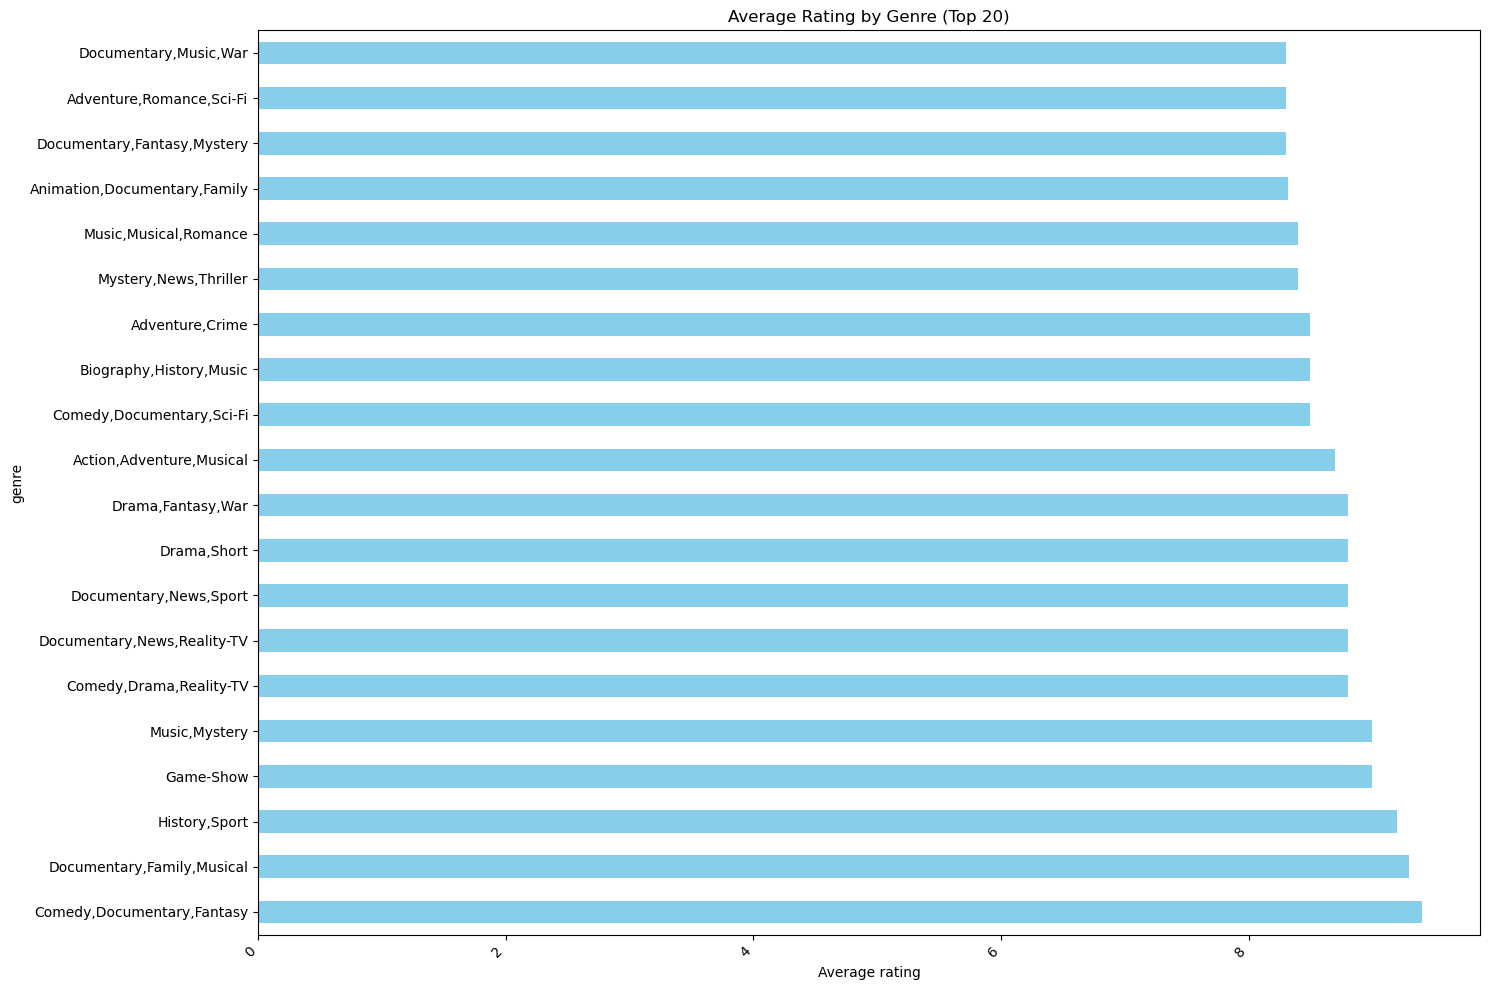

In [46]:
# Creating a horizontal bar chart to visualize average ratings by genre (Top 20)

import matplotlib.pyplot as plt


genre_avg_rating = joined_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)


top_genres = 20
top_genre_avg_rating = genre_avg_rating.head(top_genres)


plt.figure(figsize=(15, 10))
top_genre_avg_rating.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Genre (Top 20)')
plt.xlabel('Average rating')
plt.ylabel('genre')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


# Conclusion

BV studio had the highest worldwide gross followed by WB studio. Japanese language movies had the highest mean popularity while the Dz language movies had the highest mean vote average. Comedy, Documentary and fantasy genre movies had the highest average rating followed by the Documentary, Family and musical genre movies. 

# Recommendations

Focus on High-Rated Genres like Comedy, Documentary and fantasy to maximize audience satisfaction and critical acclaim. This strategy aligns with creating content that resonates positively with viewers and critics alike.


Partner with studios like BV na WB because of their high worldwide gross. This will help them establish themselves in the movie industry.


Produce movies in languages that have been used to produce popular movies or movies with high mean vote averages because they are likely to be watched by many people. A Language like japanese has been used to produce the most porpular movies while dz has been used to produce movies with the highest mean vote average.